In [1]:
import numpy as np

In [2]:
train=np.loadtxt('train.csv', delimiter=',')
train

array([[ 9. ,  6. , 17. , ...,  2. ,  0. ,  9. ],
       [11. ,  7. , 14. , ...,  4.4,  1. , 11. ],
       [ 8. ,  0. , 16. , ...,  4.7,  2. ,  8. ],
       ...,
       [28. ,  4. , 38. , ...,  1.1, 21. , 14. ],
       [23. ,  4. , 30. , ...,  1.2, 22. , 12. ],
       [19. ,  4. , 38. , ...,  1.3, 23. , 13. ]])

In [3]:
Y_train=train[:, -1]
Y_train

array([ 9., 11.,  8., ..., 14., 12., 13.])

In [4]:
D_train=train[:, :-1]
D_train

array([[ 9. ,  6. , 17. , ...,  0. ,  2. ,  0. ],
       [11. ,  7. , 14. , ...,  0. ,  4.4,  1. ],
       [ 8. ,  0. , 16. , ...,  0. ,  4.7,  2. ],
       ...,
       [28. ,  4. , 38. , ...,  0. ,  1.1, 21. ],
       [23. ,  4. , 30. , ...,  0. ,  1.2, 22. ],
       [19. ,  4. , 38. , ...,  0. ,  1.3, 23. ]])

In [5]:
A0=np.ones(len(train))
A0

array([1., 1., 1., ..., 1., 1., 1.])

In [6]:
Aug_D_train=np.c_[A0, D_train]
dim=Aug_D_train.shape[1]

In [24]:
def gram_schmidt(A):
    Q=np.zeros_like(A)
    cnt = 0
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            u -= np.dot((np.dot(Q[:, i].T, a))/np.dot(Q[:, i], Q[:, i]), Q[:, i]) 
        Q[:, cnt] =u
        cnt += 1
    return (Q)
Q=gram_schmidt(Aug_D_train)

Q matrix is [[ 1.00000000e+00 -1.01674401e+02  1.65556496e+00 ... -2.08988882e-02
  -7.19570483e-01 -1.18047893e+01]
 [ 1.00000000e+00 -9.96744011e+01  2.41013478e+00 ... -2.85710269e-02
   1.64151019e+00 -1.11965434e+01]
 [ 1.00000000e+00 -1.02674401e+02 -4.22171995e+00 ... -2.21832959e-02
   1.96014993e+00 -1.00984903e+01]
 ...
 [ 1.00000000e+00 -8.26744011e+01 -2.67602171e+00 ...  8.27478823e-02
  -1.66701649e+00  8.13796326e+00]
 [ 1.00000000e+00 -8.76744011e+01 -2.06244627e+00 ...  5.73095137e-02
  -1.60989156e+00  9.34806081e+00]
 [ 1.00000000e+00 -9.16744011e+01 -1.57158592e+00 ...  8.80815268e-02
  -1.49703828e+00  1.02654054e+01]]


In [25]:
def compute_R(A, some_Q):
    R=np.zeros(shape=(dim, dim))
    for i in range(dim):
        for j in range(i, dim):
            R[i][j]=(np.dot(some_Q[:, i].T, A[:, j]))/np.dot(some_Q[:, i], some_Q[:, i])
    return(R)
R=compute_R(Aug_D_train, Q)
print('R matrix is', R)

R matrix is [[ 1.00000000e+00  1.10674401e+02  1.68214181e+01  5.43354782e+01
   1.31970480e+03  5.45011836e+01  1.37770073e+01  1.01096370e+03
   2.70597479e+00  6.42853069e-02  1.74466689e+00  1.15000000e+01]
 [ 0.00000000e+00  1.00000000e+00  1.22715088e-01  2.51415356e-01
   9.02829493e+00 -7.65690771e-02 -1.66904177e-02  2.14477552e-04
   6.13699825e-03 -2.66074995e-04 -2.86455803e-03  3.60235691e-03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  3.02368145e-01
   1.34189975e+01 -3.43079368e-01 -1.72419885e-01  1.13498665e-01
  -2.32159833e-01 -1.12576165e-03 -1.13548003e-03 -2.87566108e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.34647800e+01 -1.13421825e+00 -8.67136530e-02  5.35837220e-02
   6.38741493e-03 -7.53785664e-04 -1.93375100e-02 -2.51103131e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00 -4.39579707e-03 -2.59515284e-03  1.60725215e-03
  -3.15512394e-04  3.76294773e-05 -9.35860642e-05 -6.7790464

In [26]:
def diag(some_Q):
    diag_matrix=np.zeros(shape=(dim,dim))
    for i in range(dim):
        diag_matrix[i, i]=1/np.dot(some_Q[:,i].T,some_Q[:, i])
    return diag_matrix
diag_matrix=diag(Q)
diag_matrix

array([[2.85192790e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.98189840e-09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.73118173e-08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.21754091e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.38994202e-11, 0.00000000e+00, 0.00000000e+00, 0.00

In [27]:
Y_train=train[:, dim-1].astype(np.float64)
Y_train

array([ 9., 11.,  8., ..., 14., 12., 13.])

In [28]:
def scalar(diag_matrix, Q, Y_train):
    Scalar_proj=np.dot(np.dot(diag_matrix, Q.T), Y_train)
    return(Scalar_proj)
Scalar_proj=scalar(diag_matrix, Q, Y_train)
Scalar_proj

array([ 8.33364562e+01,  7.74020367e-01,  2.70162583e-01,  3.66546749e-01,
        2.09576113e-02,  2.06194911e-02,  1.01743420e-01, -1.35547375e-02,
        1.28032474e+00, -5.47586739e-01,  9.58868226e-01, -7.32104711e-02])

In [29]:
def back_substitution(A, b):
    n = b.size
    w = np.zeros_like(b)

    w[n-1] = b[n-1]/A[n-1, n-1]
    C = np.zeros((n,n))
    for i in range(n-2, -1, -1):
        bb = 0
        for j in range (i+1, n):
            bb += A[i, j]*w[j]

        C[i, i] = b[i] - bb
        w[i] = C[i, i]/A[i, i]

    return w
W=back_substitution(R, Scalar_proj)
print('The weight vector w is:\n', W)

the weight vector w is:
 [-17.24539625   0.55562442   0.08773072   0.08452796   0.0179539
   0.06947436  -1.45080054   0.02084561   1.34623322  -0.62578718
   0.97001615  -0.07321047]


In [30]:
l2_norm=np.sqrt(np.dot(W,W))
print('the l2_norm of w is:', l2_norm)

the l2_norm of w is: 17.406547681602692


In [31]:
y_train_mean=Y_train.mean()
x_mean=np.mean(Aug_D_train,axis = 0)

In [32]:
b=y_train_mean-(np.dot(W, x_mean))

In [33]:
SSE=0
for i in range(len(train)):
    SSE+=np.square(Y_train[i]-np.dot(W.T, Aug_D_train[i]))
print('SSE for train dataset', SSE)

SSE for train dataset 43044033.060115516


In [34]:
TSS=np.dot((Y_train.T-y_train_mean), (Y_train.T-y_train_mean))
TSS

258967958.1480467

In [35]:
R_squre=(TSS-SSE)/TSS
R_squre

0.8337862592425117

'''test data'''

In [36]:
test=np.loadtxt('test.csv', delimiter=',')
test

array([[ 8. ,  6. , 28. , ...,  4.4,  0. ,  8. ],
       [ 9. ,  6. , 28. , ...,  4.7,  1. ,  9. ],
       [ 6. ,  0. , 19. , ...,  5.6,  2. ,  3. ],
       ...,
       [35. ,  7. , 48. , ...,  1.1, 21. , 13. ],
       [31. ,  5. , 47. , ...,  1. , 22. , 12. ],
       [25. ,  6. , 86. , ...,  1.1, 23. ,  7. ]])

In [37]:
Y_test=test[:, -1]
Y_test
Y_test_mean=np.mean(Y_test)
Aug_D_test=np.c_[A0, test[:, :-1]]
Aug_D_test

array([[ 1. ,  8. ,  6. , ...,  0. ,  4.4,  0. ],
       [ 1. ,  9. ,  6. , ...,  0. ,  4.7,  1. ],
       [ 1. ,  6. ,  0. , ...,  0. ,  5.6,  2. ],
       ...,
       [ 1. , 35. ,  7. , ...,  0. ,  1.1, 21. ],
       [ 1. , 31. ,  5. , ...,  0. ,  1. , 22. ],
       [ 1. , 25. ,  6. , ...,  0. ,  1.1, 23. ]])

In [38]:
test_SSE=0
for i in range(len(test)):
    test_SSE+=np.square(Y_test[i]-np.dot(W.T, Aug_D_test[i]))
print('SSE for testing dataset', test_SSE)

SSE for testing dataset 42278878.330978334


In [39]:
test_TSS=np.dot((Y_test.T-Y_test_mean), (Y_test.T-Y_test_mean))
test_TSS

235284738.96753335

In [40]:
test_R_squre=(test_TSS-test_SSE)/test_TSS
print('The R square for testing data:',  test_R_squre)

The R square for testing data: 0.8203076046644387


'''ridge regression begins'''

In [41]:
sh=(dim, dim)
allone=np.ones(sh)
I=np.diag(np.diag(allone))

In [42]:
new_Y=np.concatenate((Y_train, np.zeros(dim)),axis=0)
new_Y

array([ 9., 11.,  8., ...,  0.,  0.,  0.])

In [43]:
alpha=[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
new_D=[]
for i in range(len(alpha)):
    D_i=np.concatenate((Aug_D_train,np.sqrt(alpha[i]*I)),axis=0)
    new_D.append(D_i)
print(new_D[0])

[[ 1.   9.   6.  ...  0.   2.   0. ]
 [ 1.  11.   7.  ...  0.   4.4  1. ]
 [ 1.   8.   0.  ...  0.   4.7  2. ]
 ...
 [ 0.   0.   0.  ...  1.   0.   0. ]
 [ 0.   0.   0.  ...  0.   1.   0. ]
 [ 0.   0.   0.  ...  0.   0.   1. ]]


In [44]:
new_Q=[]
for k in range(len(alpha)):
    Q_k=gram_schmidt(new_D[k])
    new_Q.append(Q_k)
new_Q

[array([[ 1.00000000e+00, -1.01671245e+02,  1.65576603e+00, ...,
         -2.08378777e-02, -7.19375242e-01, -1.18044994e+01],
        [ 1.00000000e+00, -9.96712448e+01,  2.41033371e+00, ...,
         -2.85135121e-02,  1.64169426e+00, -1.11963986e+01],
        [ 1.00000000e+00, -1.02671245e+02, -4.22151782e+00, ...,
         -2.21180287e-02,  1.96035880e+00, -1.00983312e+01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.00000000e+00, -9.90833642e-02, -2.29390686e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  1.00000000e+00, -1.52327565e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 array([[ 1.00000000e+00, -1.01642847e+02,  1.65757447e+00, ...,
         -2.04720749e-02, -7.18205710e-01, -1.18027723e+01],
        [ 1.00000000e+00, -9.96428466e+01,  2.41212293e+00, ...,
         -2.81686236e-02,  1.64279653e

In [45]:
new_R=[]
for k in range(len(alpha)):
    R_k=compute_R(new_D[k], new_Q[k])
    new_R.append(R_k)
new_R

[array([[ 1.00000000e+00,  1.10671245e+02,  1.68209384e+01,
          5.43339287e+01,  1.31966716e+03,  5.44996293e+01,
          1.37766144e+01,  1.01093487e+03,  2.70589762e+00,
          6.42834735e-02,  1.74461714e+00,  1.14996720e+01],
        [ 0.00000000e+00,  1.00000000e+00,  1.22716157e-01,
          2.51424104e-01,  9.02840067e+00, -7.65482951e-02,
         -1.66852617e-02,  5.48086075e-04,  6.13766706e-03,
         -2.66044063e-04, -2.86387767e-03,  3.60602031e-03],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          3.02373694e-01,  1.34190571e+01, -3.43065369e-01,
         -1.72416344e-01,  1.13719039e-01, -2.32159211e-01,
         -1.12574034e-03, -1.13502956e-03, -2.87323789e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  1.34647077e+01, -1.13411802e+00,
         -8.66938440e-02,  5.46702920e-02,  6.39022841e-03,
         -7.53660077e-04, -1.93347539e-02, -2.50976593e-02],
        [ 0.00000000e+00,  0.0000000

In [46]:
new_diag_matrix=[]
for k in range(len(alpha)):
    matrix=diag(new_Q[k])
    new_diag_matrix.append(matrix)
new_diag_matrix

[array([[2.85184657e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.98178948e-09, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 6.73117651e-08, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.21742478e-08,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         5.38994065e-11, 0.00000000e+00, 0.0000

In [47]:
new_Scalar_proj=[]
for l in range(len(alpha)):
    proj_l=scalar(new_diag_matrix[l], new_Q[l], new_Y)
    new_Scalar_proj.append(proj_l)
new_Scalar_proj

[array([ 8.33340796e+01,  7.74019596e-01,  2.70161872e-01,  3.66533217e-01,
         2.09576516e-02,  2.06042332e-02,  1.01706466e-01, -1.35493879e-02,
         1.28018972e+00, -5.47824359e-01,  9.58160608e-01, -7.32279349e-02]),
 array([ 8.33126960e+01,  7.74012667e-01,  2.70155481e-01,  3.66411546e-01,
         2.09580142e-02,  2.04671880e-02,  1.01374608e-01, -1.35172975e-02,
         1.27937466e+00, -5.49167618e-01,  9.53798800e-01, -7.33333193e-02]),
 array([ 8.30994625e+01,  7.73943812e-01,  2.70091977e-01,  3.65205962e-01,
         2.09616072e-02,  1.91235730e-02,  9.81266544e-02, -1.34611477e-02,
         1.27780871e+00, -5.49520130e-01,  9.43192328e-01, -7.35354959e-02]),
 array([ 8.10256627e+01,  7.73296841e-01,  2.69495143e-01,  3.54168332e-01,
         2.09945023e-02,  7.92094596e-03,  7.14396427e-02, -1.34443542e-02,
         1.27567185e+00, -5.27219409e-01,  9.06100723e-01, -7.38083438e-02]),
 array([ 6.48435447e+01,  7.69347896e-01,  2.65833486e-01,  2.96528959e-01,
    

In [48]:
new_W=[]
for l in range(len(alpha)):
    W_l=back_substitution(new_R[l], new_Scalar_proj[l])
    new_W.append(W_l)
new_W

[array([-16.42099957,   0.55562408,   0.08770576,   0.08448248,
          0.01795393,   0.0694564 ,  -1.45122988,   0.02004223,
          1.34604054,  -0.62596433,   0.96931524,  -0.07322793]),
 array([-11.48131622,   0.55562234,   0.08755542,   0.08420859,
          0.01795411,   0.06934837,  -1.4537842 ,   0.01522856,
          1.34486956,  -0.62692159,   0.96499299,  -0.07333332]),
 array([-2.86440226,  0.55562572,  0.08727469,  0.08369703,  0.01795505,
         0.06915092, -1.45779076,  0.00683276,  1.34242259, -0.62603067,
         0.95443852, -0.0735355 ]),
 array([-0.33667719,  0.55569936,  0.08698012,  0.08316349,  0.01796257,
         0.06898646, -1.45379502,  0.00438388,  1.33706972, -0.59710303,
         0.91716471, -0.07380834]),
 array([-0.03429682,  0.55624839,  0.08515721,  0.080216  ,  0.01803122,
         0.06784719, -1.40891525,  0.00413572,  1.29796221, -0.40012677,
         0.65858352, -0.07587485]),
 array([-0.0037295 ,  0.55750871,  0.07574914,  0.07370815,  0.018

In [49]:
import matplotlib.pyplot as plt

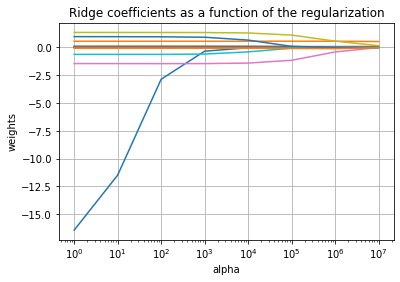

In [50]:
ax = plt.gca()

ax.plot(alpha, new_W)
ax.set_xscale('log')  
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [52]:
max_weight_alpha1000= max(np.absolute(new_W[3]))
max_weight_alpha1000

1.4537950223675093

In [ ]:
print('The most important factor is TEMP when I set ridge value equals to 1000')